## Описание проекта  
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
    
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных  
---  
    - Name — название игры  
    - Platform — платформа  
    - Year_of_Release — год выпуска  
    - Genre — жанр игры  
    - NA_sales — продажи в Северной Америке (миллионы долларов)  
    - EU_sales — продажи в Европе (миллионы долларов)  
    - JP_sales — продажи в Японии (миллионы долларов)  
    - Other_sales — продажи в других странах (миллионы долларов)  
    - Critic_Score — оценка критиков (максимум 100)  
    - User_Score — оценка пользователей (максимум 10)  
    - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st 

In [2]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
len(games)

16715

### Шаг 2. Подготовка данных.  

#### Замена названий столбцов (приведение к нижнему регистру)

In [5]:
# Получаем список названий колонок и приводим их к нижнему регистру
columns = []
for column in games.columns.values:
    columns.append(column.lower())
# Присваиваем датасету новые названия в нижнем регистре
games.columns = columns

In [6]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Приведение типов данных

In [7]:
# Приводим тип колонки "год выпуска" к целочисленному формату
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [8]:
# Приводим тип колонки "оценка критиков" к целочисленному формату
games['critic_score'] = games['critic_score'].astype('Int64')

In [9]:
# Приводим тип колонки "оценка пользователей" к формату float
# Меняем данные в столбце "оценка пользователей" со значением tbd на None
games.loc[games['user_score'] == 'tbd', 'user_score'] = None
games['user_score'] = games['user_score'].astype('float')

#### Обработка пропусков

In [10]:
# Удаляем из таблицы строки с неизвестными играми
games.query('name.isna() != True', inplace=True)

#### Добавить отдельный столбец с суммарными продажами во всех регионах

In [11]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

### Шаг 3. Исследовательский анализ данных

#### Количество выпущенных игр в разные годы

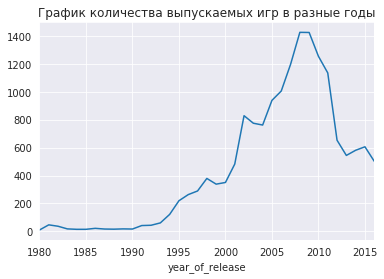

In [85]:
plt.title('График количества выпускаемых игр в разные годы')
games.groupby('year_of_release')['name'].count().plot();

In [12]:
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

#### Оценка наблюдения:  
Видно что своеобразными рубежами были:  
    - 1994 г., в котором количество игр превысило 100;  
    - 2006 г., в котором количество игр превысило 1000;  
    - 2008 г., после которого количество игр стало снижаться;
    - 2012 г., в котором количество игр стало меньше 1000;

#### Вывод:  
    Можно предположить, что в 2008 году количество игр достигло такого значения, какое не было нужно рынку, после чего количество выпускаемых игр начало неуклонно снижаться. Также на индустрию мог повлиять глобальный экономический кризис 2008 года, выход и развитие смартфонов и, соответственно, появление огромной платформы мобильных игр.

#### Как менялись продажи по платформам

In [13]:
top_sales_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index

In [14]:
top_sales = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

In [15]:
top_sales_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'], dtype='object', name='platform')

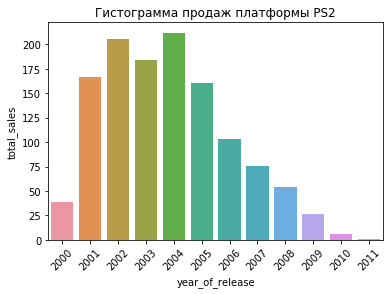

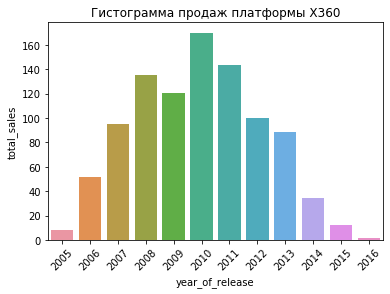

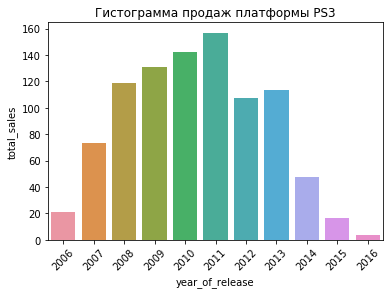

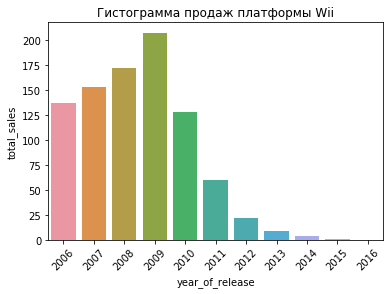

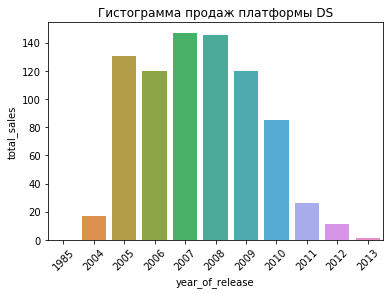

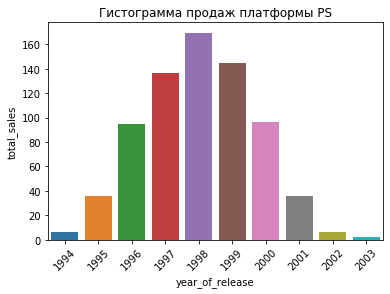

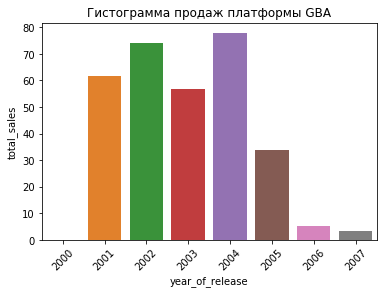

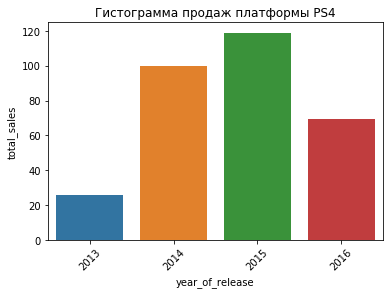

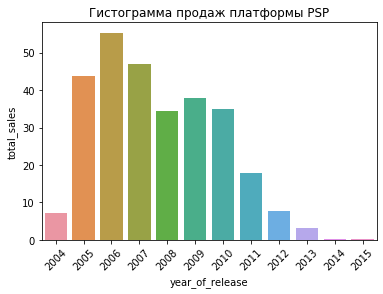

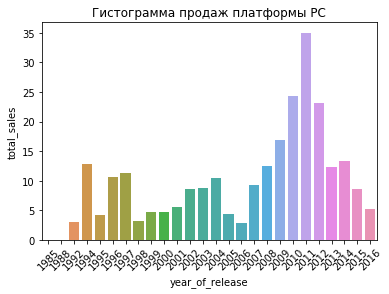

In [16]:
for platform in top_sales_platforms:
    tmp = top_sales.query('platform == @platform')
    chart = sns.barplot(x='year_of_release', y='total_sales', data = tmp)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    chart.set_title('Гистограмма продаж платформы ' + platform)
    plt.show()   

###### Вывод:  
    Средняя "продолжительность жизни" игровой платформы 4-6 лет (за исключением платформы PC - т.к. она единственная 
    платформа, на которой можно постоянно менять технические характеристики)

#### Актуальный период 

In [17]:
period = games.query('year_of_release >= 2014').copy()

In [18]:
period_sales = period.groupby(['platform']).agg({'total_sales': sum})

In [19]:
period_sales.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


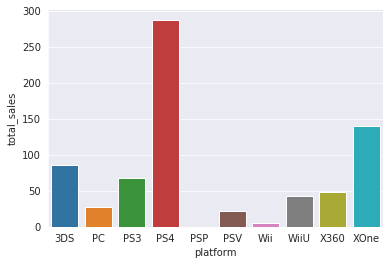

In [20]:
sns.set_style("darkgrid")
chart = sns.barplot(x=period_sales.index, y='total_sales', data = period_sales)

#### Вывод:  
    - Видна тенденция на снижение продаж в индустрии в целом после 2008 года   
    - Перспективными выглядят платформы лидеры по продажам PS4 и XOne. Так же к этому списку можно добавить PC как самую 
    долгоживщую

#### «Ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

In [21]:
platforms = ['PS4', 'XOne', 'PC']
prospect_data = games.query('year_of_release >= 2014 and platform in @platforms').copy().reset_index(drop=True)

In [86]:
for platform in platforms:
    platform_sale = prospect_data.query('platform == @platform')
    print(platform)
    print(platform_sale['total_sales'].describe())
    print()

PS4
count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

XOne
count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64

PC
count    151.000000
mean       0.179139
std        0.329359
min        0.010000
25%        0.020000
50%        0.060000
75%        0.200000
max        3.050000
Name: total_sales, dtype: float64



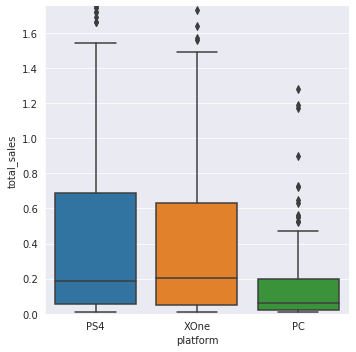

In [92]:
ax = sns.catplot(x='platform', y='total_sales', kind='box',data=prospect_data);
ax.set(ylim=(0, 1.75))

#### Описание результата:  
    - Больше всего продаж на платформе PS4, за ней следует XOne, продажи PC намного ниже.  
    - Среднее значение продажи на PS4 - 0.76, XOne - 0.61, PC - 0.179.  
    - Медианные значения: PS4 - 0.185, XOne -  0.205, PC - 0.06.  

#### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.

Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

#### Зависимость продаж от отзывов пользователей

In [70]:
prospect_ps = prospect_data.query('platform == "PS4"')
prospect_xone = prospect_data.query('platform == "XOne"')
prospect_pc = prospect_data.query('platform == "PC"')

In [71]:
prospect_platforms = [prospect_ps, prospect_xone, prospect_pc]

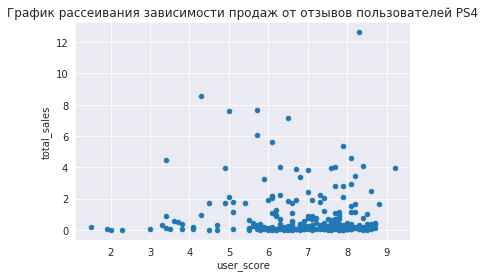

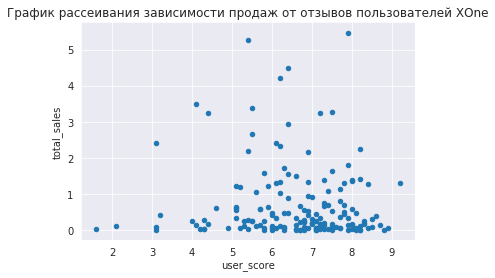

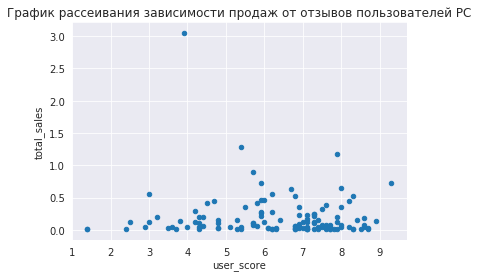

In [74]:
for platform in prospect_platforms:
    platform.plot(x='user_score', y='total_sales', kind='scatter', grid=True).set_title('График рассеивания зависимости продаж от отзывов пользователей ' + platform['platform'].values[0])
    plt.show()

In [76]:
for platform in prospect_platforms:
    print(f'Корреляция продаж от отзывов пользователей {platform["platform"].values[0]}: ', platform['total_sales'].corr(platform['user_score']).round(3))

Корреляция продаж от отзывов пользователей PS4:  -0.04
Корреляция продаж от отзывов пользователей XOne:  -0.07
Корреляция продаж от отзывов пользователей PC:  -0.072


#### Вывод:  
    - На всех платформах корреляция продаж от отзывов пользователей отрицательна.  
    - Судя по графику, самая высокая рассеяность на платформе XOne  
    - Можно сделать вывод, что оценки пользователей мало влияют на продажи на платформах.

#### Зависимость продаж от отзывов критиков

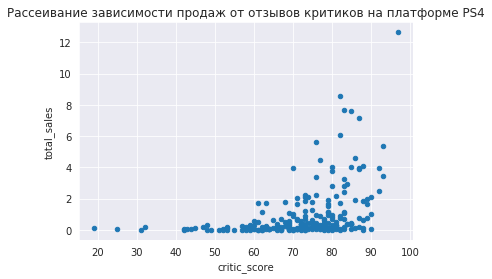

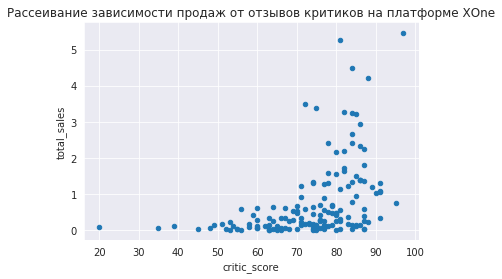

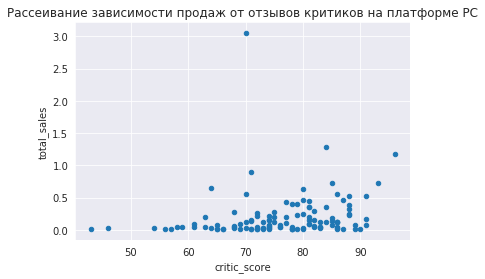

In [78]:
for platform in prospect_platforms:
    platform.plot(x='critic_score', y='total_sales', kind='scatter', grid=True).set_title('Рассеивание зависимости продаж от отзывов критиков на платформе ' + platform['platform'].values[0])
    plt.show()

In [80]:
for platform in prospect_platforms:
    print(f'Корреляция продаж от отзывов критиков на {platform["platform"].values[0]}: ', (platform['total_sales'].astype('float64')).corr(platform['critic_score'].astype('float64')).round(3))

Корреляция продаж от отзывов критиков на PS4:  0.403
Корреляция продаж от отзывов критиков на XOne:  0.429
Корреляция продаж от отзывов критиков на PC:  0.175


#### Вывод:  
    - Высокий уровень прямой корреляции продаж от отзывов критиков на платформах PS4 и XOne: 0.403 и 0.429 соответственно.  
    - На платформе PC корреляция продаж от отзывов критиков также положительна, но существенно ниже: 0.175  
    - Можно сделать вывод, что высокие оценки критиков чаще оказывают положительный эффект на продажи на PS4 и XOne, чем на PC
    

#### Oбщее распределение игр по жанрам

In [37]:
genre = prospect_data.groupby(['genre'])['total_sales'].sum().reset_index()


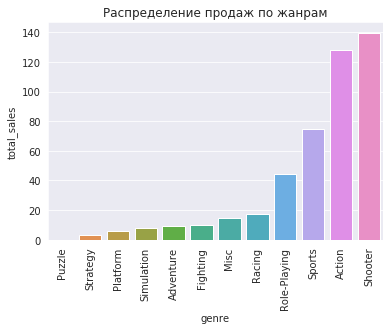

In [38]:
chart = sns.barplot(x='genre', y='total_sales', data = genre.sort_values(by='total_sales'))
chart.set_title('Распределение продаж по жанрам')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

#### Вывод:  
    - Среди всех игр явно выделяются жанры Action и Shooter. Также высокие показатели у Sports и Role-Playing  
    - Самые низкие продажи у игр жанров Puzzle и Strategy.

### Шаг 4. Составьте портрет пользователя каждого региона

#### Самые популярные платформы (топ-5) для каждого региона

In [39]:
top_sales_na = period.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()

In [40]:
top_sales_eu = period.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()

In [41]:
top_sales_jp = period.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()

In [42]:
na_total = period['na_sales'].sum().round(2)
eu_total = period['eu_sales'].sum().round(2)
jp_total = period['jp_sales'].sum().round(2)

In [43]:
top_sales_na['part_of_na_market'] = (top_sales_na['na_sales'] / na_total).round(2)

In [44]:
top_sales_na

,platform,na_sales,part_of_na_market
3,PS4,98.61,0.35
9,XOne,81.27,0.29
8,X360,28.30,0.10
0,3DS,22.64,0.08
2,PS3,22.05,0.08


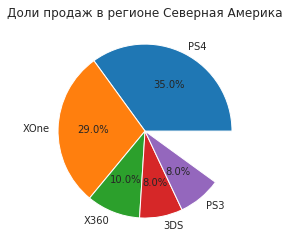

In [45]:
plt.title('Доли продаж в регионе Северная Америка')
plt.pie(top_sales_na['part_of_na_market'], labels=top_sales_na['platform'],  autopct='%1.1f%%');

In [46]:
top_sales_eu['part_of_eu_market'] = (top_sales_eu['eu_sales'] / eu_total).round(2)

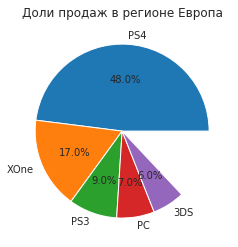

In [47]:
plt.title('Доли продаж в регионе Европа')
plt.pie(top_sales_eu['part_of_eu_market'], labels=top_sales_eu['platform'],  autopct='%1.1f%%');

In [48]:
top_sales_jp['part_of_jp_market'] = (top_sales_jp['jp_sales'] / jp_total).round(2)
top_sales_jp

,platform,jp_sales,part_of_jp_market
0,3DS,44.24,0.48
3,PS4,15.02,0.16
5,PSV,14.54,0.16
2,PS3,11.22,0.12
7,WiiU,7.31,0.08


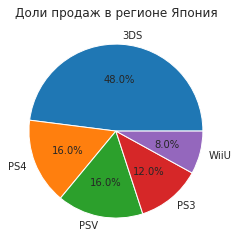

In [49]:
plt.title('Доли продаж в регионе Япония')
plt.pie(top_sales_jp['part_of_jp_market'], labels=top_sales_jp['platform'],  autopct='%1.1f%%');

#### Различия в долях продаж:  
    - По набору платформ рынок Европы схож с рынком Северной Америке, структура Японского рынка отличается.
    - В Европе 48% приходится на платформу PS4, у XOne 17%, 9% и 7% у PS3 и PC соответственно, 6% у 3DS. 13% Приходится на все остальные платформы.  
    - В Японии лидер продаж 3DS - 48%, PS4 и PSV по 16%, PS3 - 12%, WiiU - 8%. На Японском рынке5 топ-платформ занимают все 100% продаж.  
    - В Северной Америке у PS4 - 35%, XOne - 29%, X360 - 10%, 3DS и PS3 по 8%. На остальные платформы приходится 10%.  
    

#### Самые популярные жанры 

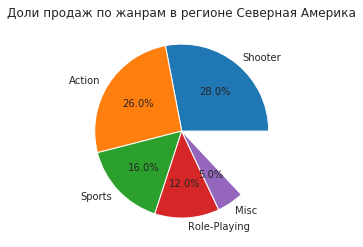

In [50]:
# Создам таблицу жанров с топовыми продажами в Северной Америке и строим круговую диаграмму по долям продаж
top_genre_na = period.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
top_genre_na['part_of_total'] = (top_genre_na['na_sales'] / na_total).round(2)
plt.title('Доли продаж по жанрам в регионе Северная Америка')
plt.pie(top_genre_na['part_of_total'], labels=top_genre_na['genre'],  autopct='%1.1f%%');

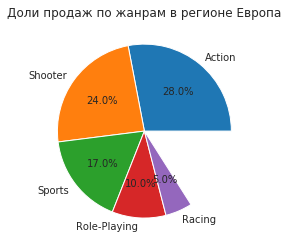

In [51]:
# Создам таблицу жанров с топовыми продажами в Европе и строим круговую диаграмму по долям продаж
top_genre_eu = period.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
top_genre_eu['part_of_total'] = (top_genre_eu['eu_sales'] / eu_total).round(2)
plt.title('Доли продаж по жанрам в регионе Европа')
plt.pie(top_genre_eu['part_of_total'], labels=top_genre_eu['genre'],  autopct='%1.1f%%');

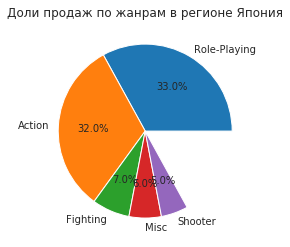

In [52]:
# Создам таблицу жанров с топовыми продажами в Японии и строим круговую диаграмму по долям продаж
top_genre_jp = period.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
top_genre_jp['part_of_total'] = (top_genre_jp['jp_sales'] / jp_total).round(2)
plt.title('Доли продаж по жанрам в регионе Япония')
plt.pie(top_genre_jp['part_of_total'], labels=top_genre_jp['genre'],  autopct='%1.1f%%');

#### Разница в предпочтениях жанров по регионам:  
    - В Европе и Северной Америке предпочтения по жанрам схожи. Самые высокие показатели у Action и Shooter. На третьем месте Спорт, на 4ом Role-Playing. 5 место в Америке Misc, в Европе - Racing.  
    - В Японии самый популярный жанр Role-Playing. На 2ом месте Action, на 3 - Fighting, №4 - Misc, Shooter замыкает пятерку.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

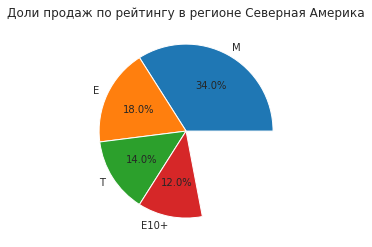

In [53]:
# Создам таблицу рейтингов с топовыми продажами в Северной Америке и строим круговую диаграмму по долям продаж
rating_na = period.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)
rating_na['part_of_total'] = (rating_na['na_sales'] / na_total).round(2)
plt.title('Доли продаж по рейтингу в регионе Cеверная Америка')
plt.pie(rating_na['part_of_total'], labels=rating_na['rating'],  autopct='%1.1f%%');

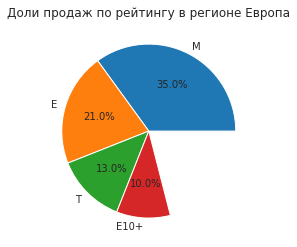

In [54]:
# Создам таблицу рейтингов с топовыми продажами в Европе и строим круговую диаграмму по долям продаж
rating_eu = period.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False)
rating_eu['part_of_total'] = (rating_eu['eu_sales'] / eu_total).round(2)
plt.title('Доли продаж по рейтингу в регионе Европа')
plt.pie(rating_eu['part_of_total'], labels=rating_eu['rating'],  autopct='%1.1f%%');

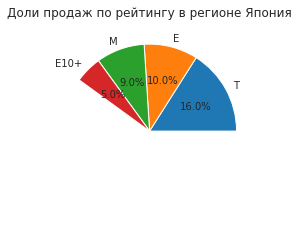

In [55]:
# Создам таблицу рейтингов с топовыми продажами в Японии и строим круговую диаграмму по долям продаж
rating_jp = period.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False)
rating_jp['part_of_total'] = (rating_jp['jp_sales'] / jp_total).round(2)
plt.title('Доли продаж по рейтингу в регионе Япония')
plt.pie(rating_jp['part_of_total'], labels=rating_jp['rating'],  autopct='%1.1f%%');


#### Вывод о влиянии рейтинга на продажи в разных регионах:   
    - Струтктура продаж в зависимости от рейтинга на рынках Европы и Северной Америки оказалась идентичной: продажи по рейтингам расположены на одинаковых позициях (М, Е, Т, Е10+), доля от общих продаж по региону отличается на 1-4%.  
    - В Японии ситуация иная: расположение продаж в зависимости от рейтинга Т, Е, М, Е10+.   
    - Продажи игр с не указанным рейтингом в Японии: 60%. В Северной Америке 22%, в Европе 21%. Можно сделать вывод, что в Европе и Северной Америке игры с рейтингом занимают существенно больший объем рынка, чем в Японии, а в Японии рейтинг меньше влияет на количество продаж.  

### Шаг 5. Проверка гипотез

##### Гипотеза №1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Для возможности отвергнуть или не отвергать гипотезу №1 сформулируем нулевую гипотезу: "Средний пользовательский рейтинг плафтормы Xbox One и средний пользовательский рейтинг плафтормы PC равны между собой".  
Альтернативной будет гипотеза: "Средний пользовательский рейтинг плафтормы Xbox One и средний пользовательский рейтинг плафтормы PC не равны между собой"

In [56]:
x_one = period.query('platform == "XOne" and user_score.isna() == False').copy()
pc = period.query('platform == "PC" and user_score.isna() == False').copy()

In [57]:
len(x_one)

165

In [58]:
len(pc)

122

In [59]:
# Для проверки нулевой гипотезы используем метод ttest_ind
alpha = .05

results = st.ttest_ind(
    x_one['user_score'], 
    pc['user_score'], 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


##### Гипотеза №2: "Средние пользовательские рейтинги жанров Action и Sports разные"

Для возможности отвергнуть или не отвергать гипотезу №1 сформулируем нулевую гипотезу: "Средний пользовательский рейтинг жанра Action и средний пользовательский рейтинг жанра Sports равны между собой".
Альтернативной будет гипотеза: "Средний пользовательский рейтинг жанра Action и средний пользовательский рейтинг жанра Sports равны между собой".  
Для отвержения гипотезы №2 нулевая гипотеза должна быть опровергнута

In [60]:
sports = games.query('genre == "Sports" and user_score.isna() == False').copy()
action = games.query('genre == "Action" and user_score.isna() == False').copy()

In [61]:
len(sports)

1103

In [62]:
len(action)

1830

In [63]:
# Для проверки нулевой гипотезы используем метод ttest_ind
alpha = .02

results = st.ttest_ind(
    sports['user_score'], 
    action['user_score'], 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


#### Вывод по результатам проверки гипотез:  
---
    1) Для проверки гипотезы №1 была сформулирована нулевая гипотеза: "Средний пользовательский рейтинг плафтормы Xbox One и средний пользовательский рейтинг плафтормы PC равны между собой". С помощью метода ttest_ind проверяем на равенство выборки с средним пользовательским рейтингом плафтормы PC  и  средним пользовательским рейтингом плафтормы Xbox One , указав параметр equal_var = False т.к. выборки не равны между собой.     
        Результат проверки - Не получилось отвергнуть нулевую гипотезу. Следовательно нет оснований полагать, что Средние пользовательские рейтинги плафтормы Xbox One и средний пользовательский рейтинг плафтормы PC не одинаковы между собой.  
    2) Для проверки гипотезы №2 была сформулирована нулевая гипотеза:  "Средний пользовательский рейтинг жанра Action и средний пользовательский рейтинг жанра Sports равны между собой". Для отвержения гипотезы №2 нулевая гипотеза должна быть опровергнута. С помощью метода ttest_ind проверяем на равенство выборки с средним пользовательским рейтингом жанра Action  и  средним пользовательским рейтингом жанра Sports, указав параметр equal_var = False т.к. выборки не равны между собой.  
        Результат проверки - Не получилось отвергнуть нулевую гипотезу. Следовательно нет оснований полагать, что Средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод:  
---  
#### В ходе выполнения проекта было сделано:  
    1) Скачан датасет, данные изучены;
    2) Произведена подготовка данных:  
        - названия столбцов приведены к общему виду;
        - форматы колонок "год релиза" и "оценка критиков" приведены к целочисленному;  
        - В колонке "оценка пользователей" значение tbd было заменено на None, а данные приведены к формату float;  
        - Удалены строки с безымянными играми;  
        - Добавлен столбец с общими продажами игр;  
    3) Проведен Исследовательский анализ данных: 
        - Проанализировано количество выпускаемых игр в разные годы;  
        - Вычислены "сроки жизни" платформ, которые занимают топ-10 по общим продажам.  
        - Выделен актуальный период для анализа и построения прогнозов на 2017г.  
        - Выбраны наиболее перспективные платформы;  
        - Построены диаграммы размаха продаж всех игр для каждой платформы;  
        - Построены графики рассеивания зависимости продаж от отзывов пользователей для каждой платформы, и рассчитана корреляция;  
        - Построены графики рассеивания зависимости продаж от отзывов критиков для каждой платформы, и рассчитана корреляция;  
        - Выделены самые прибыльные жанры и жанры с самыми низкими продажами.  
    4) Составлен портрет пользователя каждого региона (NA, EU, JP):  
        - Определены топ-5 самых популярных платформ, в каждом регионе, рассчитана доля продаж от всех продаж в регионе;
        - Определены самые популярные жанры, в каждом регионе, рассчитана доля продаж от всех продаж в регионе;  
        - Посчитаны продажи игр разных рейтингов каждого региона. Определено влияение рейтинга ESRB на продажи в разных регионах.  
    5) Проверены гипотезы:  
        - Выяснилось, что можно отвергнута гипотезу о том, что "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые";  
        - Выяснилось, что можно отвергнута гипотезу о том, что  "Средние пользовательские рейтинги жанров Action и Sports разные";  

#### Общие выводы:  
---
    - Общее количество выпускаемых игр сначало стремительно росло, но после 2008 года начало снижаться;  
    - Рынки Европы и Северной Америки схожи по предпочтениям в жанрах, любимых платформах и зависимостях от рейтингов ESRB. Рынок Японии значительно отличается по этим показателям.  
    - Отзывы критиков влияют на продажи сильнее чем отзывы пользователей.  
    - Самые перспективные по продажам платформы это PS4, Xbox ONE и PC.  
    - Уникальность Японского рынка, скорее всего, обусловлена культурными особенностями данного региона (такие как аниме, манга). Наличие такого жанра как JRPG (Japanese Role-Playing Game) очень популярного непосредственно в Японии сказывается на предпочтениях в жанрах. В связи с тем, что в Японии были созданы такие компании как Sony, Nintendo, Sega в данном регионе наибольшей популярностью пользуются консольные платформы. Рейтинг ESRB в Японии не имеет такого влияния как в Северной Америке и Европе, т.к. в Японии существует рейтинг CERO(Computer Entertainment Rating Organization)